# 합리적인 소비를 위한 시장 농수축산물 시장가격에 대한 분석

## 지역별,날씨별,계절별 데이터 분석

- 학번:2024105245

- 학과:소프트웨어 융합학과

- 학년:1

- 이름:김현정

# 목차
  1. 주제 선정 이유
  2. 가설 정의
  3. 분석할 데이터의 출처와 데이터 내용설명 
  4. 참고자료

# 1.주제 선정 이유
- 장을 볼 때마다 계속 달라지는 농수산물들의 가격들과 같은 서울이더라도 동네마다 다른 가격의 농수산물을 보고 치솟는 물가인 오늘날
최적의 합리적인 소비를 하기위해 시장(서울지역)에서 농수산물이 얼만큼 다양하게 어떻게 다른지 분석해보았다

# 2 가설 설정
1. 소득수준이 높은 동네일수록 농수산물 가격이 비쌀 것이다. 
2. 비가 오는 날씨일 때 농수산물이 더 쌀 것이다.
3. 수확이 어려운 겨울에 농수산물이 더 비쌀 것이다.

# 3. 분석할 데이터의 출처와 데이터 내용설명

1. 서울시 생필품 농수축산물 가격 정보
- 제공기관: 서울특별시
- 데이터 등록 날짜: 2012.06.22.
- 데이터 최종 수정날짜: 2024.05.15.
- 설명: 서울시 물가모니터가 주1회 자치구별 전통시장에 나가 농수축산물 16개 품목을 조사하고 그 가격을 공개하는 정보입니다.
- 데이터 출처 링크: https://data.seoul.go.kr/dataList/OA-1170/S/1/datasetView.do
2. 서울시 자치구별 1인당 지역내총생산 및 수준지수(2015년 기준) 통계
- 제공기관: 서울특별시
- 데이터 등록 날짜: 2020.07.01.
- 데이터 최종 수정날짜: 2022.01.25.
- 설명: 서울시 자치구별 지역내총생산, 1인당 지역내총생산 현황을 제공하는 정보입니다.
- 데이터 출처 링크: https://data.seoul.go.kr/dataList/11063/S/2/datasetView.do
3. 서울시 날짜별 강수량
- 제공기관: 기상청
- 데이터 등록 날짜: 2022.1.1.
- 데이터 최종 수정날짜: 2024.05.15.
- 설명: 서울시 날짜별 강수량을 제공하는 정보입니다.
-  데이터 출처 링크:https://data.kma.go.kr/stcs/grnd/grndRnList.do?pgmNo=69#.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
df1 = pd.read_excel("./서울시 생필품 농수축산물 가격 정보.xlsx")
df2 = pd.read_excel("./서울시 날짜별 강수량.xlsx")
df3 = pd.read_excel("./자치구별+1인당+지역내총생산+및+수준지수(2015년+기준)_20240516010808.xlsx")

In [3]:
df1#서울시 생필품 농수축산물 가격 정보

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,점검일자,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름
0,345108,90,우림시장,42,갈치 1마리,NaN,3500,2024-04-01 00:00:00,50cm 작음,2024-04-29 00:00:00,1,전통시장,260000,중랑구
1,345109,90,우림시장,19,감자 1kg,NaN,4500,2024-04-01 00:00:00,NaN,2024-04-29 00:00:00,1,전통시장,260000,중랑구
2,345110,90,우림시장,37,계란 10개,NaN,6650,2024-04-01 00:00:00,풀무원통통신선란,2024-04-29 00:00:00,1,전통시장,260000,중랑구
3,345111,90,우림시장,20,고구마 1kg,NaN,4500,2024-04-01 00:00:00,NaN,2024-04-29 00:00:00,1,전통시장,260000,중랑구
4,345112,90,우림시장,41,고등어 1마리,NaN,3000,2024-04-01 00:00:00,NaN,2024-04-29 00:00:00,1,전통시장,260000,중랑구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59525,249284,277,양재시장,55,식용유 1.8L,NaN,0,2023-11-01 00:00:00,NaN,2023-11-15 00:00:00,1,전통시장,650000,서초구
59526,249249,277,양재시장,11,딸기 100g,NaN,0,2023-11-01 00:00:00,NaN,2023-11-15 00:00:00,1,전통시장,650000,서초구
59527,249254,277,양재시장,63,만두 1800g,NaN,0,2023-11-01 00:00:00,NaN,2023-11-15 00:00:00,1,전통시장,650000,서초구
59528,249244,277,양재시장,36,닭고기 1kg,NaN,7000,2023-11-01 00:00:00,NaN,2023-11-15 00:00:00,1,전통시장,650000,서초구


In [4]:
df2#서울시 날짜별 강수량

,날짜,지점,강수량(mm)
0,2021-01-01,108,NaN
1,2021-01-02,108,NaN
2,2021-01-03,108,NaN
3,2021-01-04,108,0.0
4,2021-01-05,108,0.0
...,...,...,...
1225,2024-05-10,108,NaN
1226,2024-05-11,108,31.7
1227,2024-05-12,108,NaN
1228,2024-05-13,108,NaN


In [5]:
df3#자치구별+1인당+지역내총생산+및+수준지수(2015년+기준)

,자치구별(1),자치구별(2),지역내총생산(당해년가격) (백만원),구성비 (%),인구(추계인구) (명),1인당 지역내총생산 (천원),수준지수(서울특별시=100) (%)
0,서울시,종로구,35719537,7.6,149705,238599,480.27
1,서울시,중구,61342710,13.0,127427,481395,968.98
2,서울시,용산구,13294640,2.8,225647,58918,118.59
3,서울시,성동구,13999893,3.0,287580,48682,97.99
4,서울시,광진구,6554954,1.4,349926,18732,37.71
5,서울시,동대문구,7711273,1.6,347913,22164,44.61
6,서울시,중랑구,4860242,1.0,381449,12742,25.65
7,서울시,성북구,6371894,1.3,436199,14608,29.40
8,서울시,강북구,3462961,0.7,294628,11754,23.66
9,서울시,도봉구,3490683,0.7,310752,11233,22.61


-------------------

## 데이터 가공 및 가설 분석하기

- 가설 1 데이터 가공하기

In [6]:
# 자치구별 수준지수를 기준으로 정렬
df3 =df3.sort_values(by='수준지수(서울특별시=100) (%)', ascending=False).reset_index(drop=True)
# 순위 추가
df3['순위'] = df3.index + 1
#필요한 요소들만 남기기
df3=df3[['자치구별(2)', '수준지수(서울특별시=100) (%)', '순위']]


- 가공된 데이터 확인하기

In [7]:
df3

,자치구별(2),수준지수(서울특별시=100) (%),순위
0,중구,968.98,1
1,종로구,480.27,2
2,강남구,312.72,3
3,영등포구,219.60,4
4,서초구,194.81,5
5,금천구,144.46,6
6,용산구,118.59,7
7,마포구,117.97,8
8,송파구,101.23,9
9,성동구,97.99,10


- 가설 1 그래프 그리기

<Figure size 1000x800 with 0 Axes>

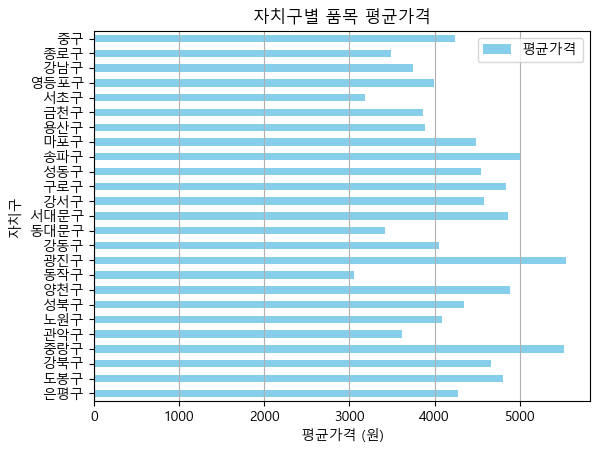

In [8]:
#자치구별 랭킹 리스트를 만들어줌.
place_rank = list(df3['자치구별(2)'])
place_rank_reverse=place_rank[::-1]
# 결과를 저장할 딕셔너리 초기화
average_prices = {}
# '가격(원)' 열을 숫자형으로 변환
df1['가격(원)'] = pd.to_numeric(df1['가격(원)'], errors='coerce')
# 주어진 구들에 대해 각 품목별로 평균 가격 계산
for gu in place_rank_reverse:
    # 해당 구의 데이터만 필터링
    gu_data = df1[df1['자치구 이름'] == gu]
    # 해당 구의 평균 가격 계산
    avg_price = gu_data['가격(원)'].mean()
    # 결과 딕셔너리에 추가
    average_prices[gu] = avg_price
# 결과 딕셔너리를 DataFrame으로 변환
avg_price_df = pd.DataFrame(list(average_prices.items()), columns=['자치구', '평균가격'])
avg_price_df = avg_price_df.set_index('자치구')
# 자치구 리스트의 순서에 맞게 정렬
avg_price_df = avg_price_df.loc[place_rank_reverse]
# 그래프 그리기
plt.figure(figsize=(10, 8))
avg_price_df.plot(kind='barh', color='skyblue')
plt.xlabel('평균가격 (원)')
plt.ylabel('자치구')
plt.title('자치구별 품목 평균가격')
plt.grid(axis='x')
plt.show()


----------------------

# 결론 도출
## 가설1. 소득수준이 높은 동네일수록 농수산물 가격이 비쌀 것이다.
### 가설1은 거짓이다.
-'자치구별 품목 평균 가격' 그래프를 보았을 때 소득수준에 따라 농수산물 가격의 평균이 비례한 관계를 가지지 않고 불규칙하게 분포되어 있는 것을 보여준다. 따라서 가설 1은 거짓이다.

- 본인이 생각하기에 가설1이 거짓인 이유는 요즘은 교통이 발달해서 옛날보다 유통하기에 더 편리해졌기 때문에 지리적 요인 때문에 가격이 차이가 안 난다고 생각한다.

---------------------

- 가설 2 데이터 가공하기

In [9]:
#강수량이 없는 날은 제거해 줌
df2 = df2[df2['강수량(mm)'] > 0]


- 가공된 데이터 확인하기

In [10]:
df2

,날짜,지점,강수량(mm)
5,2021-01-06,108,2.3
11,2021-01-12,108,2.6
14,2021-01-15,108,0.2
17,2021-01-18,108,0.3
20,2021-01-21,108,9.2
...,...,...,...
1209,2024-04-24,108,9.0
1220,2024-05-05,108,48.3
1221,2024-05-06,108,12.3
1222,2024-05-07,108,2.4


- 가설 2 데이터 가공하기

In [11]:
#df2에서 비가 오는 날 리스트를 만듦
rain_date=list(df2['날짜'])
#'YYYY-MM-DD' 형식의 문자열로 변환
rain_date = [k.strftime('%Y-%m-%d') for k in rain_date]
#날짜 데이터를 판다스 datetime 객체로 변환
df2['날짜'] = pd.to_datetime(df2['날짜'])
df1['년도-월'] = pd.to_datetime(df1['년도-월'])
# 날짜를 'YYYY-MM-DD' 형식의 문자열로 변환
df1_date = df1['년도-월'].dt.strftime('%Y-%m-%d')
#df1에 가격이 갱신된 날짜 중 비가 내린 날 집합 생성하기
df1_rain_date=set(df1_date).intersection(set(rain_date))

C:\Users\linai\AppData\Local\Temp\ipykernel_21276\4157262767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['날짜'] = pd.to_datetime(df2['날짜'])


- 가공된 데이터 확인하기

In [12]:
rain_date

['2021-01-06',
 '2021-01-12',
 '2021-01-15',
 '2021-01-18',
 '2021-01-21',
 '2021-01-22',
 '2021-01-26',
 '2021-01-28',
 '2021-01-30',
 '2021-02-01',
 '2021-02-03',
 '2021-02-04',
 '2021-02-15',
 '2021-02-16',
 '2021-03-01',
 '2021-03-02',
 '2021-03-15',
 '2021-03-16',
 '2021-03-20',
 '2021-03-21',
 '2021-03-27',
 '2021-03-28',
 '2021-03-29',
 '2021-04-03',
 '2021-04-04',
 '2021-04-12',
 '2021-04-13',
 '2021-04-16',
 '2021-04-27',
 '2021-04-28',
 '2021-04-29',
 '2021-04-30',
 '2021-05-01',
 '2021-05-02',
 '2021-05-04',
 '2021-05-05',
 '2021-05-07',
 '2021-05-15',
 '2021-05-16',
 '2021-05-17',
 '2021-05-20',
 '2021-05-21',
 '2021-05-22',
 '2021-05-25',
 '2021-05-27',
 '2021-05-28',
 '2021-05-29',
 '2021-05-30',
 '2021-05-31',
 '2021-06-01',
 '2021-06-03',
 '2021-06-08',
 '2021-06-10',
 '2021-06-11',
 '2021-06-15',
 '2021-06-18',
 '2021-06-23',
 '2021-06-26',
 '2021-06-27',
 '2021-06-28',
 '2021-06-29',
 '2021-06-30',
 '2021-07-03',
 '2021-07-04',
 '2021-07-07',
 '2021-07-08',
 '2021-07-

In [13]:
df1_date

0        2024-04-01
1        2024-04-01
2        2024-04-01
3        2024-04-01
4        2024-04-01
            ...    
59525    2023-11-01
59526    2023-11-01
59527    2023-11-01
59528    2023-11-01
59529    2023-11-01
Name: 년도-월, Length: 59530, dtype: object

In [21]:
#df1데이터 날짜 중 비오는 날 찾기
print(f"df1 데이터 중 비가오는 날은{df1_rain_date}입니다.")

df1 데이터 중 비가오는 날은{'2023-12-01', '2023-11-01'}입니다.


- 가설 2 데이터 가공하기

In [15]:
#비 오는 날짜만으로 df1에서 데이터를 추출함
rain_data = df1[df1['년도-월'].isin(list(df1_rain_date))]
#비오는 날짜에서만의 평균을 구함
rain_ave = rain_data.groupby('품목 이름')['가격(원)'].mean().reset_index()
#나머지 달도 똑같음
rain_rest_data = df1[~df1['년도-월'].isin(list(df1_rain_date))]
rain_rest_ave = rain_rest_data.groupby('품목 이름')['가격(원)'].mean().reset_index()

C:\Users\linai\AppData\Local\Temp\ipykernel_21276\4166820182.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  rain_data = df1[df1['년도-월'].isin(list(df1_rain_date))]
C:\Users\linai\AppData\Local\Temp\ipykernel_21276\4166820182.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  rain_rest_data = df1[~df1['년도-월'].isin(list(df1_rain_date))]


- 가설 2 그래프 그리기

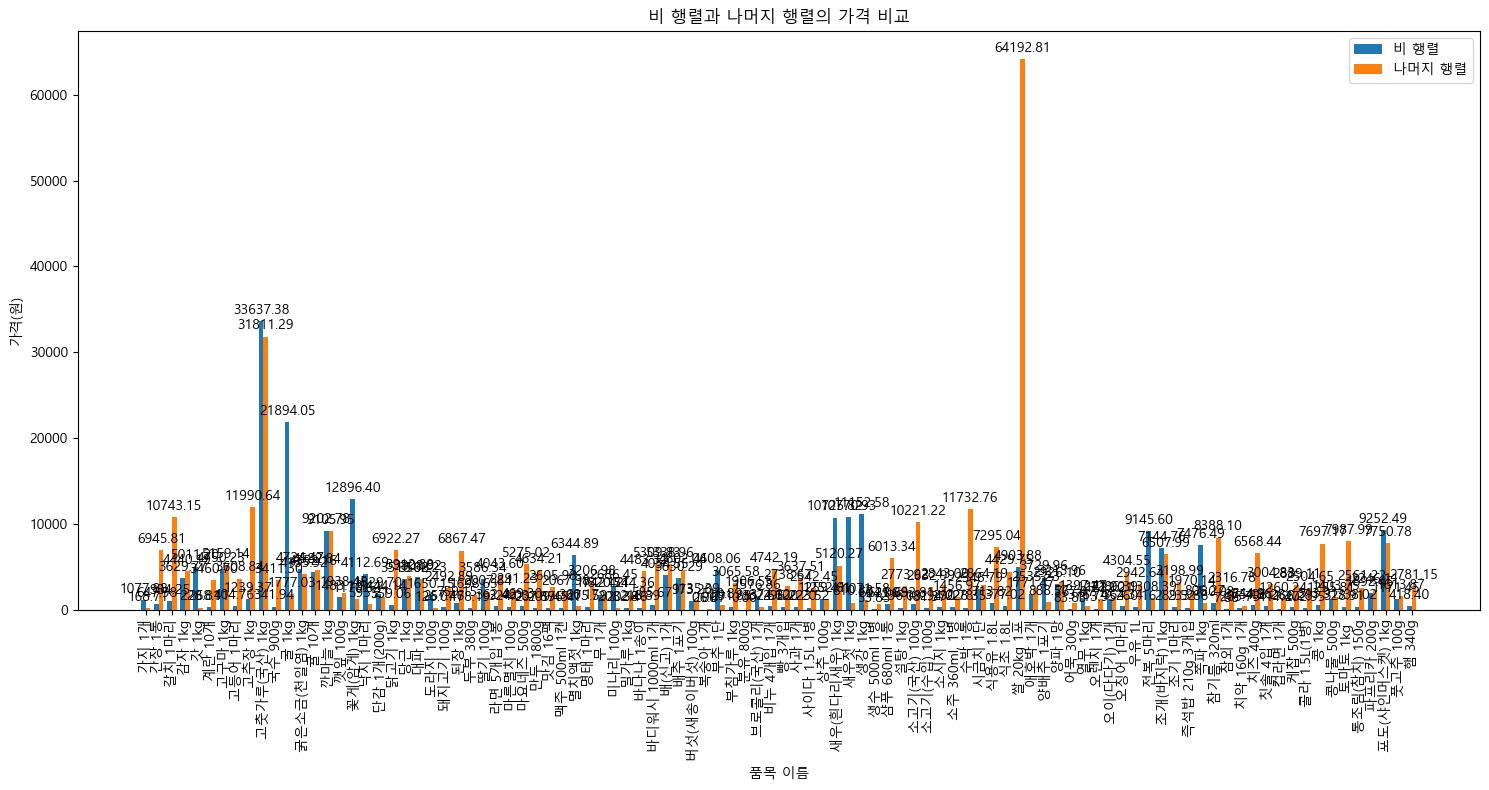

In [16]:
df_a = pd.DataFrame(rain_ave)
df_b = pd.DataFrame(rain_rest_ave)
# 두 데이터프레임을 비교하기 위해 인덱스를 품목 이름으로 설정
df_a.set_index("품목 이름", inplace=True)
df_b.set_index("품목 이름", inplace=True)
# 막대 그래프를 위한 설정
labels = df_a.index
x = np.arange(len(labels))  # 품목의 인덱스 위치
width = 0.35  # 막대 너비
fig, ax = plt.subplots(figsize=(15, 8))
# a행렬과 b행렬의 막대 그래프 생성
bars1 = ax.bar(x - width/2, df_a['가격(원)'], width, label='비 행렬')
bars2 = ax.bar(x + width/2, df_b['가격(원)'], width, label='나머지 행렬')
# 그래프에 레이블 추가
ax.set_xlabel('품목 이름')
ax.set_ylabel('가격(원)')
ax.set_title('비 행렬과 나머지 행렬의 가격 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
# 각 막대 위에 가격 표시
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3포인트 위에 텍스트 표시
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bars1)
autolabel(bars2)
fig.tight_layout()
plt.show()




In [22]:
#결과 한 눈에 보기
rain_low = 0
rain_high = 0
for k in rain_ave['품목 이름']:
    if k in rain_rest_ave['품목 이름'].values:
        rain_price = rain_ave.loc[rain_ave['품목 이름'] == k, '가격(원)'].iloc[0]
        rain_rest_price = rain_rest_ave.loc[rain_rest_ave['품목 이름'] == k, '가격(원)'].iloc[0]
        if rain_price < rain_rest_price:
            rain_low += 1
        elif rain_price > rain_rest_price:
            rain_high += 1
        else:
            pass
print(f"비가오는 날엔 {rain_low}개가 가격이 쌌고 {rain_high}개가 쌌다.")

비가오는 날엔 72개가 가격이 쌌고 26개가 쌌다.


------------------

# 결론 도출
## 2. 비가 오는 날씨일 때 농수산물이 더 쌀 것이다.
### 가설2는 사실이다.
-'비 행렬과 나머지 행렬의 가격 비교' 그래프를 분석하여 비가오는 날에 더 싼 농수산물 개수와 더 비싼 농수산물 개수를 비교하였을 때 더 싼 개수가 더 많았기 때문에 가설이 사실이라 할 수 있다. 

----------------

- 가설 3 데이터 가공하기

In [18]:
#겨울 데이터 생성하고 평균 구하기
winter_data = df1[df1['년도-월'].dt.month.isin([11, 12, 1])]#겨울을(11월,12월,1월이라 가정함)
winter_ave = winter_data.groupby('품목 이름')['가격(원)'].mean().reset_index()
#나머지 달도 똑같이 
rest_data = df1[df1['년도-월'].dt.month.isin([2,3,4,5,6,7,8,9,10])]
rest_ave = rest_data.groupby('품목 이름')['가격(원)'].mean().reset_index()

- 가설 3 그래프 그리기

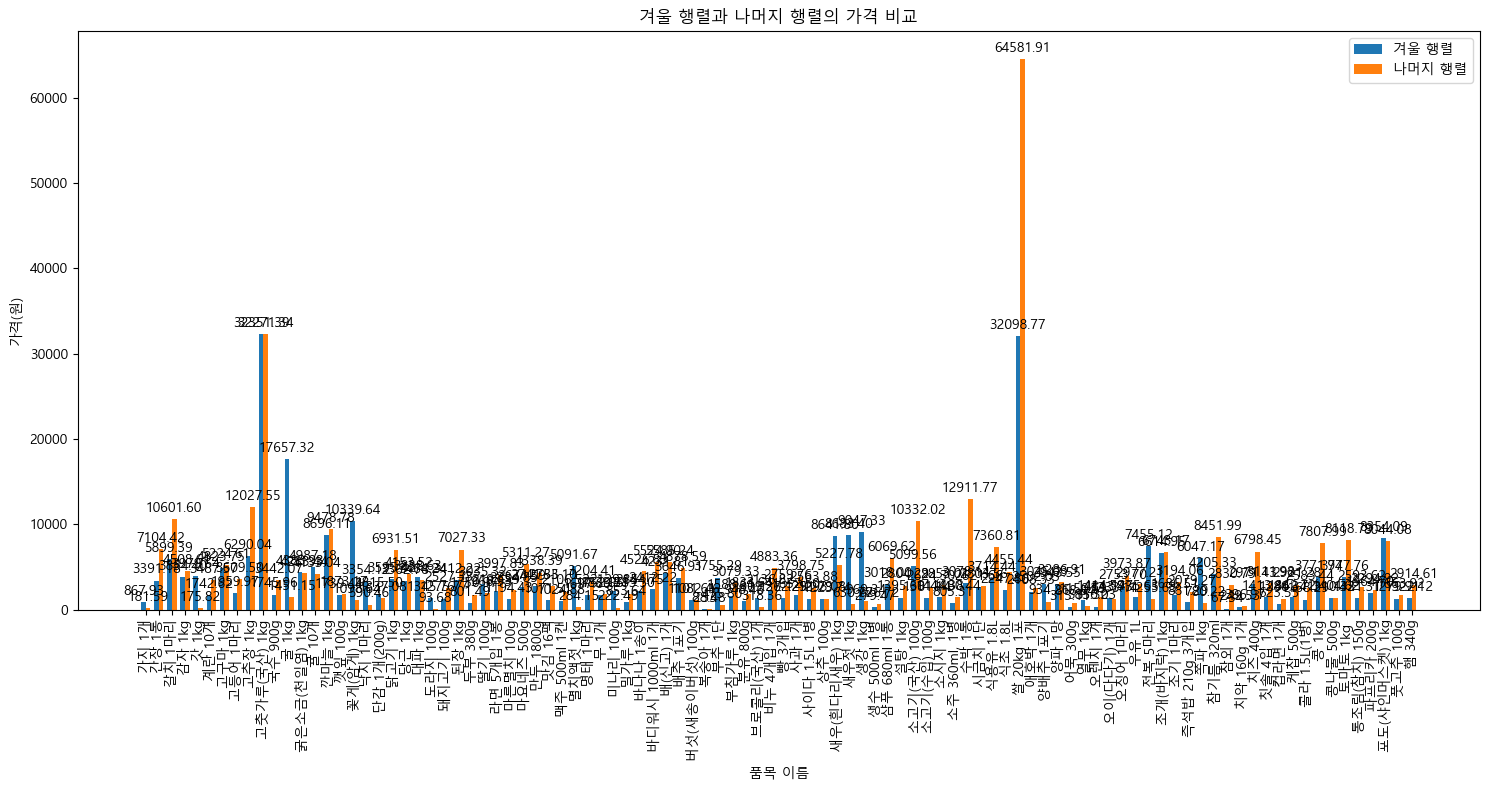

In [19]:
#가설 3
df_a = pd.DataFrame(winter_ave)
df_b = pd.DataFrame(rest_ave)
# 두 데이터프레임을 비교하기 위해 인덱스를 품목 이름으로 설정
df_a.set_index("품목 이름", inplace=True)
df_b.set_index("품목 이름", inplace=True)
# 막대 그래프를 위한 설정
labels = df_a.index
x = np.arange(len(labels))  # 품목의 인덱스 위치
width = 0.35  # 막대 너비
fig, ax = plt.subplots(figsize=(15, 8))
# a행렬과 b행렬의 막대 그래프 생성
bars1 = ax.bar(x - width/2, df_a['가격(원)'], width, label='겨울 행렬')
bars2 = ax.bar(x + width/2, df_b['가격(원)'], width, label='나머지 행렬')
# 그래프에 레이블 추가
ax.set_xlabel('품목 이름')
ax.set_ylabel('가격(원)')
ax.set_title('겨울 행렬과 나머지 행렬의 가격 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
# 각 막대 위에 가격 표시
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3포인트 위에 텍스트 표시
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bars1)
autolabel(bars2)
fig.tight_layout()
plt.show()
#가설3

In [24]:
#결과 한 눈에 보기
winter_high = 0#겨울 가격이 나머지 시즌 가격보다 비싼 품목 수
winter_low = 0#겨울 가격이 나머지 시즌 가격보다 싼 품목 수
for k in winter_ave['품목 이름']:
    for j in rest_ave['품목 이름']:
        if k == j:
            winter_price = winter_ave.loc[winter_ave['품목 이름'] == k, '가격(원)'].iloc[0]
            rest_price = rest_ave.loc[rest_ave['품목 이름'] == j, '가격(원)'].iloc[0]
            if winter_price > rest_price:
                winter_high += 1
            elif winter_price < rest_price:
                winter_low += 1
            else:
                pass
print(f"겨울엔 {winter_low}개가 가격이 쌌고 {winter_high}개가 쌌다.")

겨울엔 71개가 가격이 쌌고 27개가 쌌다.


-----------------

# 결론 도출
## 3.수확이 어려운 겨울에 농수산물이 더 비쌀 것이다.
### 가설3은 거짓이다.
-'겨울 행렬과 나머지 행렬의 가격 비교' 그래프를 분석하여 겨울에 더 비싼 농수산물 개수와 더 싼 농수산물 개수를 비교하였을 때 더 싼 개수가 많았기 때문에 가설3은 거짓임

- 본인이 생각하기에 가설3이 거짓인 이유는 겨울이여도 과학기술이 발달한 요즘은 하우스 재배 산업이 활발하기 때문에 겨울이여도 농수산물 가격이 비교적 높아지지 않는 것이라고 생각한다.

----------------------

# 참고 문헌

- Pandas : https://pandas.pydata.org/
- matplotlib : https://matplotlib.org/
- 기타

     [주피터 노트북 마크다운 정리](https://leedakyeong.tistory.com/entry/Markdown-Jupyter-Notebook-%EC%A3%BC%ED%94%BC%ED%84%B0-%EB%85%B8%ED%8A%B8%EB%B6%81-%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EC%A0%95%EB%A6%AC)
     [판다스 한글 폰트 깨짐(윈도우)](https://inuplace.tistory.com/456)
     
- 이 외 수업 동영상 및 여러 사이트 참고


#### 별첨
- 자치구별+1인당+지역내총생산+및+수준지수(2015년+기준)_20240516010808.xlsx
- 서울시 생필품 농수축산물 가격 정보.xlsx
- 서울시 날짜별 강수량.xlsx

--------------

# 최종 결론

- 가설1. 소득수준이 높은 동네일수록 농수산물 가격이 비쌀 것이다.
 '자치구별 품목 평균 가격' 그래프를 보았을 때 소득수준에 따라 농수산물 가격의 평균이 비례한 관계를 가지지 않고 불규칙하게 분포되어 있는 것을 보여준다. 따라서 가설 1은 거짓이다.
- 가설2.비가 오는 날씨일 때 농수산물이 더 쌀 것이다.
 '비 행렬과 나머지 행렬의 가격 비교' 그래프를 분석하여 비가오는 날에 더 싼 농수산물 개수와 더 비싼 농수산물 개수를 비교하였을 때 더 싼 개수가 더 많았기 때문에 가설이 사실이라 할 수 있다.
- 가설3.수확이 어려운 겨울에 농수산물이 더 비쌀 것이다.
 '겨울 행렬과 나머지 행렬의 가격 비교' 그래프를 분석하여 겨울에 더 비싼 농수산물 개수와 더 싼 농수산물 개수를 비교하였을 때 더 싼 개수가 많았기 때문에 가설3은 거짓임 
#### 분석 결과를 토대로 소득수준에 따라는 농수산물 가격의 비례성이 나타나지 않았고 비가 왔을 때 농수산물이 더 쌌다. 그리고 겨울이라고 농수산물이 더 비싸지도 않았다. 이러한 결과들은 유통, 교통, 재배 산업이 발달하는 결과라고 생각하고 단지 장을 보더라도 사회구조 전체를 생각하는 사고를 촉구한다.



---------------